<a href="https://colab.research.google.com/github/NgWeiZhen/Colab/blob/master/Active_Learning_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [ ]:
#changing the working directory
%cd /content/drive/MyDrive/Kaggle
#Check the present working directory using pwd command

/content/drive/MyDrive/Kaggle


In [ ]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 990kB/s]


In [ ]:
!ls

 iris.zip			       'Speed Dating Data.csv'
 kaggle.json			       'Speed Dating Data Key.doc'
 PS_20174392719_1491204439457_log.csv


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [ ]:
!ls

 database.sqlite   PS_20174392719_1491204439457_log.csv
 Iris.csv	  'Speed Dating Data.csv'
 kaggle.json	  'Speed Dating Data Key.doc'


In [ ]:
pip install modAL

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

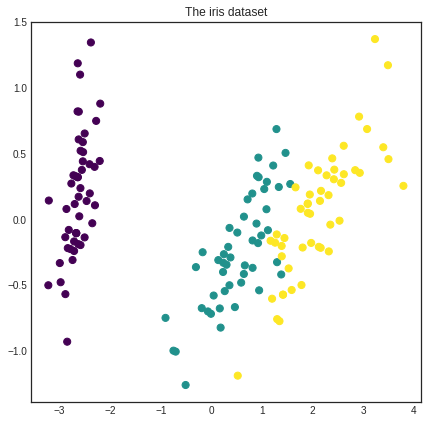

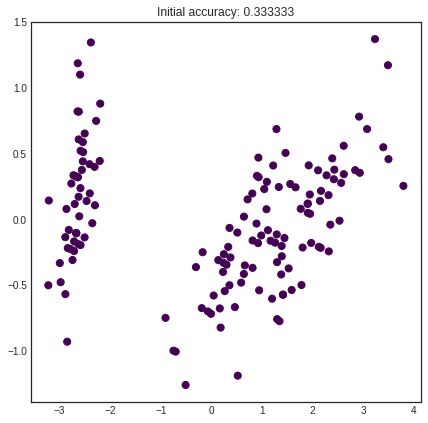

Accuracy before active learning: 0.333333
Accuracy after query no. 1: 0.333333
Accuracy after query no. 2: 0.646667
Accuracy after query no. 3: 0.640000
Accuracy after query no. 4: 0.640000
Accuracy after query no. 5: 0.660000
Accuracy after query no. 6: 0.666667
Accuracy after query no. 7: 0.666667
Accuracy after query no. 8: 0.780000
Accuracy after query no. 9: 0.780000
Accuracy after query no. 10: 0.780000
Accuracy after query no. 11: 0.780000
Accuracy after query no. 12: 0.780000
Accuracy after query no. 13: 0.760000
Accuracy after query no. 14: 0.746667
Accuracy after query no. 15: 0.733333
Accuracy after query no. 16: 0.840000
Accuracy after query no. 17: 0.880000
Accuracy after query no. 18: 0.880000
Accuracy after query no. 19: 0.880000
Accuracy after query no. 20: 0.880000
Accuracy after query no. 21: 0.900000
Accuracy after query no. 22: 0.900000
Accuracy after query no. 23: 0.880000
Accuracy after query no. 24: 0.913333
Accuracy after query no. 25: 0.940000
Accuracy after qu

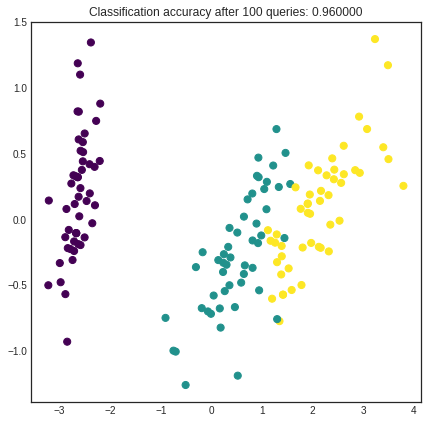

In [ ]:
import pandas as pd
df01 = pd.read_csv('Iris.csv')
del df01['Id']
df01['Species'] = df01['Species'].astype('category')
df01['Species'] = df01['Species'].cat.codes
df_train = df01[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',]]
df_train_y = df01['Species']
temp = df_train.values
temp_y = df_train_y.values

# visualizing the classes
with plt.style.context('seaborn-white'):
    pca = PCA(n_components=2).fit_transform(temp)
    plt.figure(figsize=(7, 7))
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=temp_y, cmap='viridis', s=50)
    plt.title('The iris dataset')
    plt.show()

# initial training data
train_idx = [0, 50, 100]
X_train = temp[train_idx]
y_train = temp_y[train_idx]

# generating the pool
X_pool = np.delete(temp, train_idx, axis=0)
y_pool = np.delete(temp_y, train_idx)

# initializing the active learner
learner = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)


# visualizing initial prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(temp)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Initial accuracy: %f' % learner.score(temp, temp_y))
    plt.show()

print('Accuracy before active learning: %f' % learner.score(temp, temp_y))

# pool-based sampling
n_queries = 100
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    print('Accuracy after query no. %d: %f' % (idx+1, learner.score(temp, temp_y)))

# plotting final prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(temp)
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Classification accuracy after %i queries: %f' % (n_queries, learner.score(temp, temp_y)))
    plt.show()


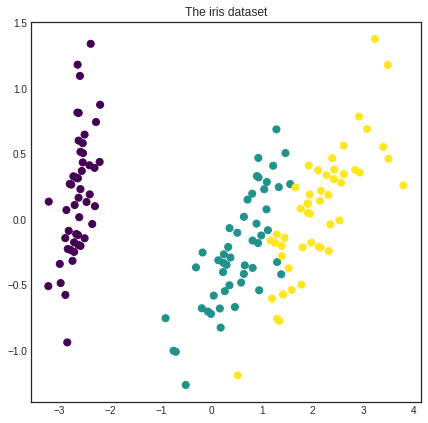

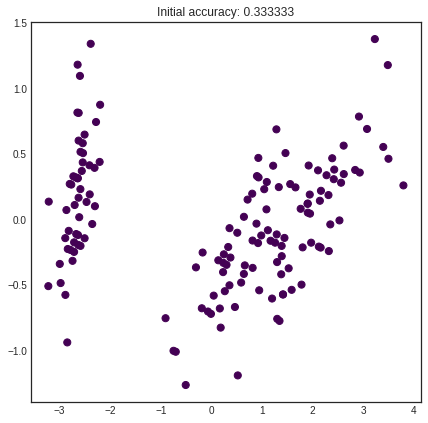

Accuracy before active learning: 0.333333
Accuracy after query no. 1: 0.333333
Accuracy after query no. 2: 0.646667
Accuracy after query no. 3: 0.640000
Accuracy after query no. 4: 0.640000
Accuracy after query no. 5: 0.660000
Accuracy after query no. 6: 0.666667
Accuracy after query no. 7: 0.666667
Accuracy after query no. 8: 0.780000
Accuracy after query no. 9: 0.780000
Accuracy after query no. 10: 0.780000
Accuracy after query no. 11: 0.780000
Accuracy after query no. 12: 0.780000
Accuracy after query no. 13: 0.760000
Accuracy after query no. 14: 0.746667
Accuracy after query no. 15: 0.733333
Accuracy after query no. 16: 0.840000
Accuracy after query no. 17: 0.880000
Accuracy after query no. 18: 0.880000
Accuracy after query no. 19: 0.880000
Accuracy after query no. 20: 0.880000


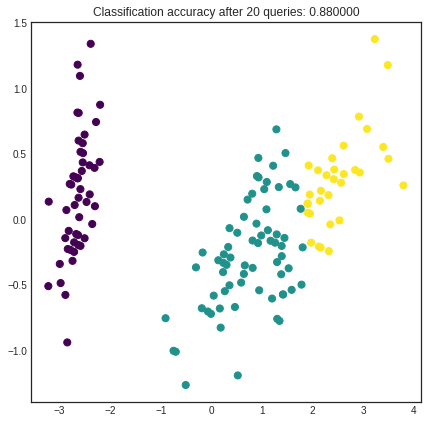

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from modAL.models import ActiveLearner

# loading the iris dataset
iris = load_iris()
# visualizing the classes
with plt.style.context('seaborn-white'):
    pca = PCA(n_components=2).fit_transform(iris['data'])
    plt.figure(figsize=(7, 7))
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=iris['target'], cmap='viridis', s=50)
    plt.title('The iris dataset')
    plt.show()

# initial training data
train_idx = [0, 50, 100]
X_train = iris['data'][train_idx]
y_train = iris['target'][train_idx]

# generating the pool
X_pool = np.delete(iris['data'], train_idx, axis=0)
y_pool = np.delete(iris['target'], train_idx)

# initializing the active learner
learner = ActiveLearner(
    estimator=KNeighborsClassifier(n_neighbors=3),
    X_training=X_train, y_training=y_train
)

# visualizing initial prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(iris['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Initial accuracy: %f' % learner.score(iris['data'], iris['target']))
    plt.show()

print('Accuracy before active learning: %f' % learner.score(iris['data'], iris['target']))

# pool-based sampling
n_queries = 20
for idx in range(n_queries):
    query_idx, query_instance = learner.query(X_pool)
    learner.teach(
        X=X_pool[query_idx].reshape(1, -1),
        y=y_pool[query_idx].reshape(1, )
    )
    # remove queried instance from pool
    X_pool = np.delete(X_pool, query_idx, axis=0)
    y_pool = np.delete(y_pool, query_idx)
    print('Accuracy after query no. %d: %f' % (idx+1, learner.score(iris['data'], iris['target'])))

# plotting final prediction
with plt.style.context('seaborn-white'):
    plt.figure(figsize=(7, 7))
    prediction = learner.predict(iris['data'])
    plt.scatter(x=pca[:, 0], y=pca[:, 1], c=prediction, cmap='viridis', s=50)
    plt.title('Classification accuracy after %i queries: %f' % (n_queries, learner.score(iris['data'], iris['target'])))
    plt.show()